In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [ ]:
# Load the CSV Data
data_handlebar_acc= pd.read_csv('../data/handlebar/Accelerometer_data_merged_ESP1.csv')  # Load the CSV data using pandas
data_handlebar_acc.head()  # Display the first few rows of the dataframe

,Unnamed: 0,NTP,Acc-X,Acc-Y,Acc-Z,Timestamp_unix,curb_activity,curb_scene,curb_height_down,curb_height_up,curb_type_down,curb_type_up,roughness
0,0,2024-07-24 10:26:01.863,1.417374,4.161118,8.762772,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
1,1,2024-07-24 10:26:01.867,1.393433,4.161118,8.753204,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
2,2,2024-07-24 10:26:01.872,1.407791,4.165909,8.762772,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
3,3,2024-07-24 10:26:01.877,1.446091,4.170700,8.781937,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
4,4,2024-07-24 10:26:01.884,1.417374,4.175491,8.753204,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0


In [ ]:
#Convert 'NTP' to Datetime and Set as Index
data_handlebar_acc['NTP'] = pd.to_datetime(data_handlebar_acc['NTP'])
data_handlebar_acc.set_index('NTP', inplace=True)

Value counts for curb_activity:
curb_activity
0.0    380713
1.0    168522
Name: count, dtype: int64



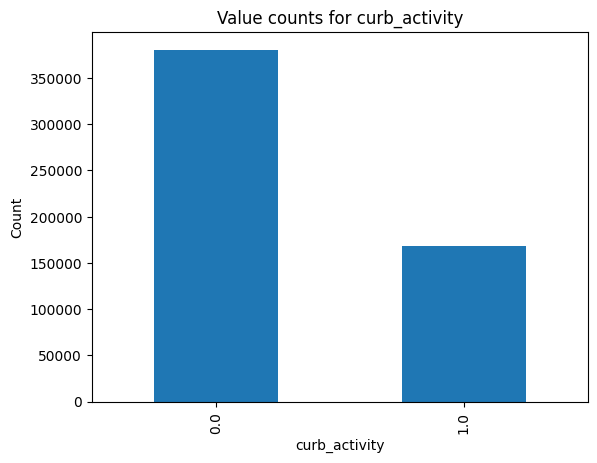

Value counts for curb_scene:
curb_scene
0.0    530463
1.0     18772
Name: count, dtype: int64



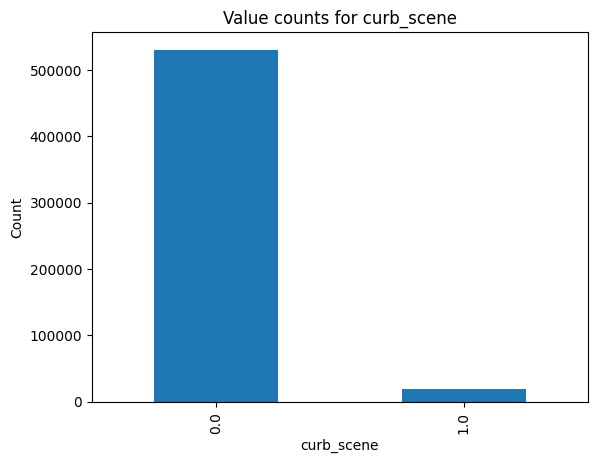

Value counts for curb_height_down:
curb_height_down
3.0    309680
1.0    126686
2.0    112869
Name: count, dtype: int64



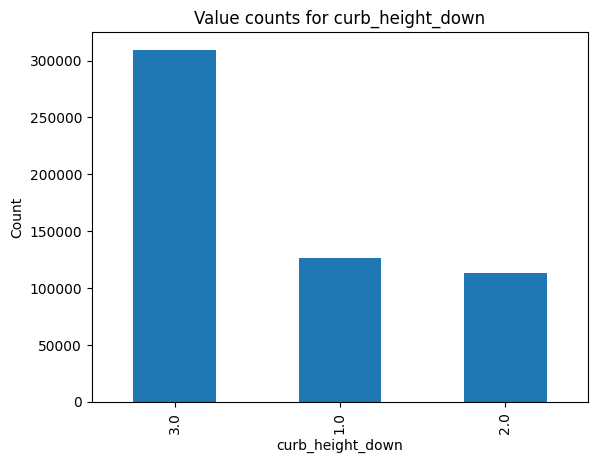

Value counts for curb_height_up:
curb_height_up
3.0    340019
2.0    125457
1.0     83759
Name: count, dtype: int64



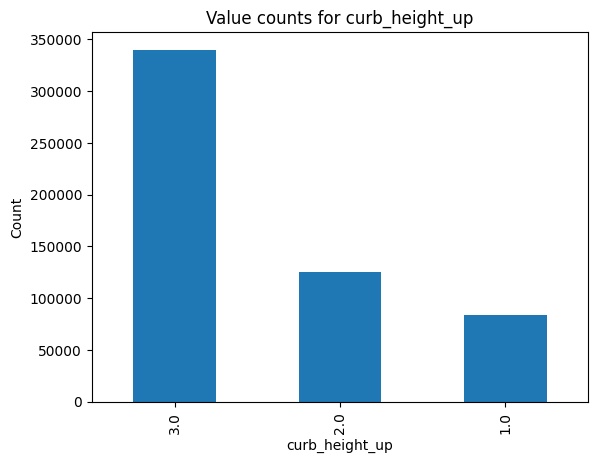

Value counts for curb_type_down:
curb_type_down
1.0    375075
2.0    174160
Name: count, dtype: int64



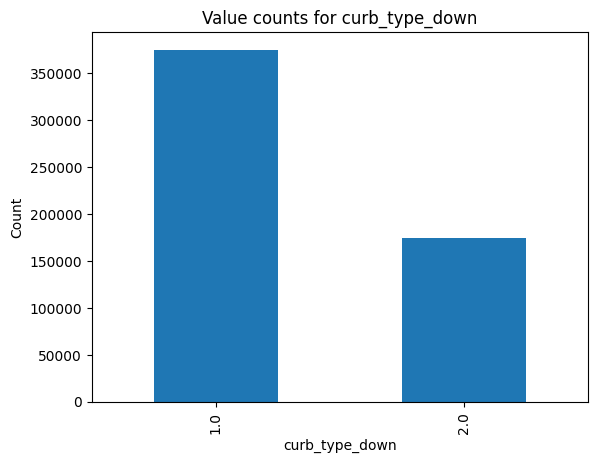

Value counts for curb_type_up:
curb_type_up
1.0    412486
2.0    136749
Name: count, dtype: int64



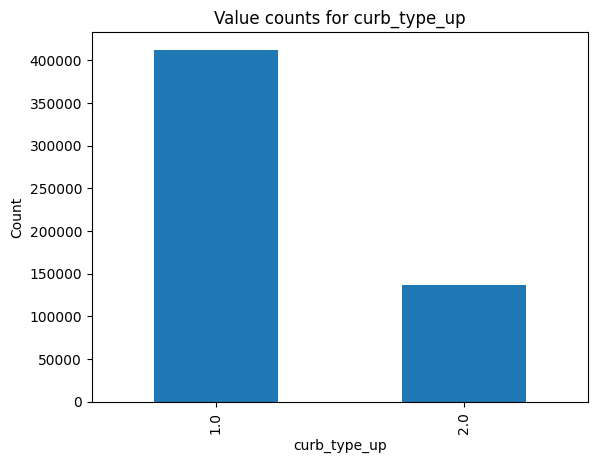

Value counts for roughness:
roughness
-1.0    227150
 1.0    125457
 2.0    112869
 0.0     83759
Name: count, dtype: int64



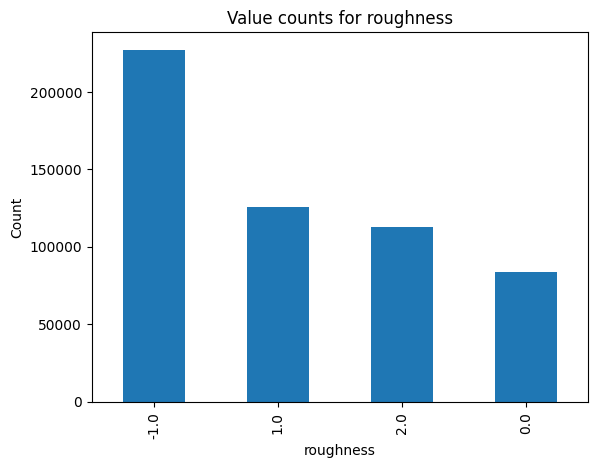

In [92]:
features = ['curb_activity', 'curb_scene', 'curb_height_down', 
            'curb_height_up', 'curb_type_down', 'curb_type_up', 'roughness']

for feature in features:
    print(f"Value counts for {feature}:")
    print(data_handlebar_acc[feature].value_counts())
    print()
    # Plotting the value counts as a bar chart
    data_handlebar_acc[feature].value_counts().plot(kind='bar', title=f"Value counts for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

In [ ]:
#Missing Values
missing_rows = data_handlebar_acc[data_handlebar_acc.isnull().any(axis=1)]
#This checks each row for missing values. If any value in a row is True (meaning there's a missing value), .any(axis=1) returns True for that row.

missing_rows

,Unnamed: 0,Acc-X,Acc-Y,Acc-Z,Timestamp_unix,curb_activity,curb_scene,curb_height_down,curb_height_up,curb_type_down,curb_type_up,roughness
NTP,,,,,,,,,,,,
NaT,21827,NaN,NaN,NaN,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
NaT,21832,NaN,NaN,NaN,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
NaT,21855,NaN,NaN,NaN,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
NaT,21860,NaN,NaN,NaN,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
NaT,21877,NaN,NaN,NaN,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,535201,NaN,NaN,NaN,1.721819e+12,0.0,1.0,3.0,1.0,2.0,1.0,0.0
NaT,535214,NaN,NaN,NaN,1.721819e+12,0.0,1.0,3.0,1.0,2.0,1.0,0.0
NaT,535221,NaN,NaN,NaN,1.721819e+12,0.0,1.0,3.0,1.0,2.0,1.0,0.0


In [ ]:
missing_values_sum = data_handlebar_acc.isnull().sum()
missing_values_sum


Unnamed: 0             0
Acc-X               2020
Acc-Y               2020
Acc-Z               2020
Timestamp_unix         0
curb_activity          0
curb_scene             0
curb_height_down       0
curb_height_up         0
curb_type_down         0
curb_type_up           0
roughness              0
dtype: int64

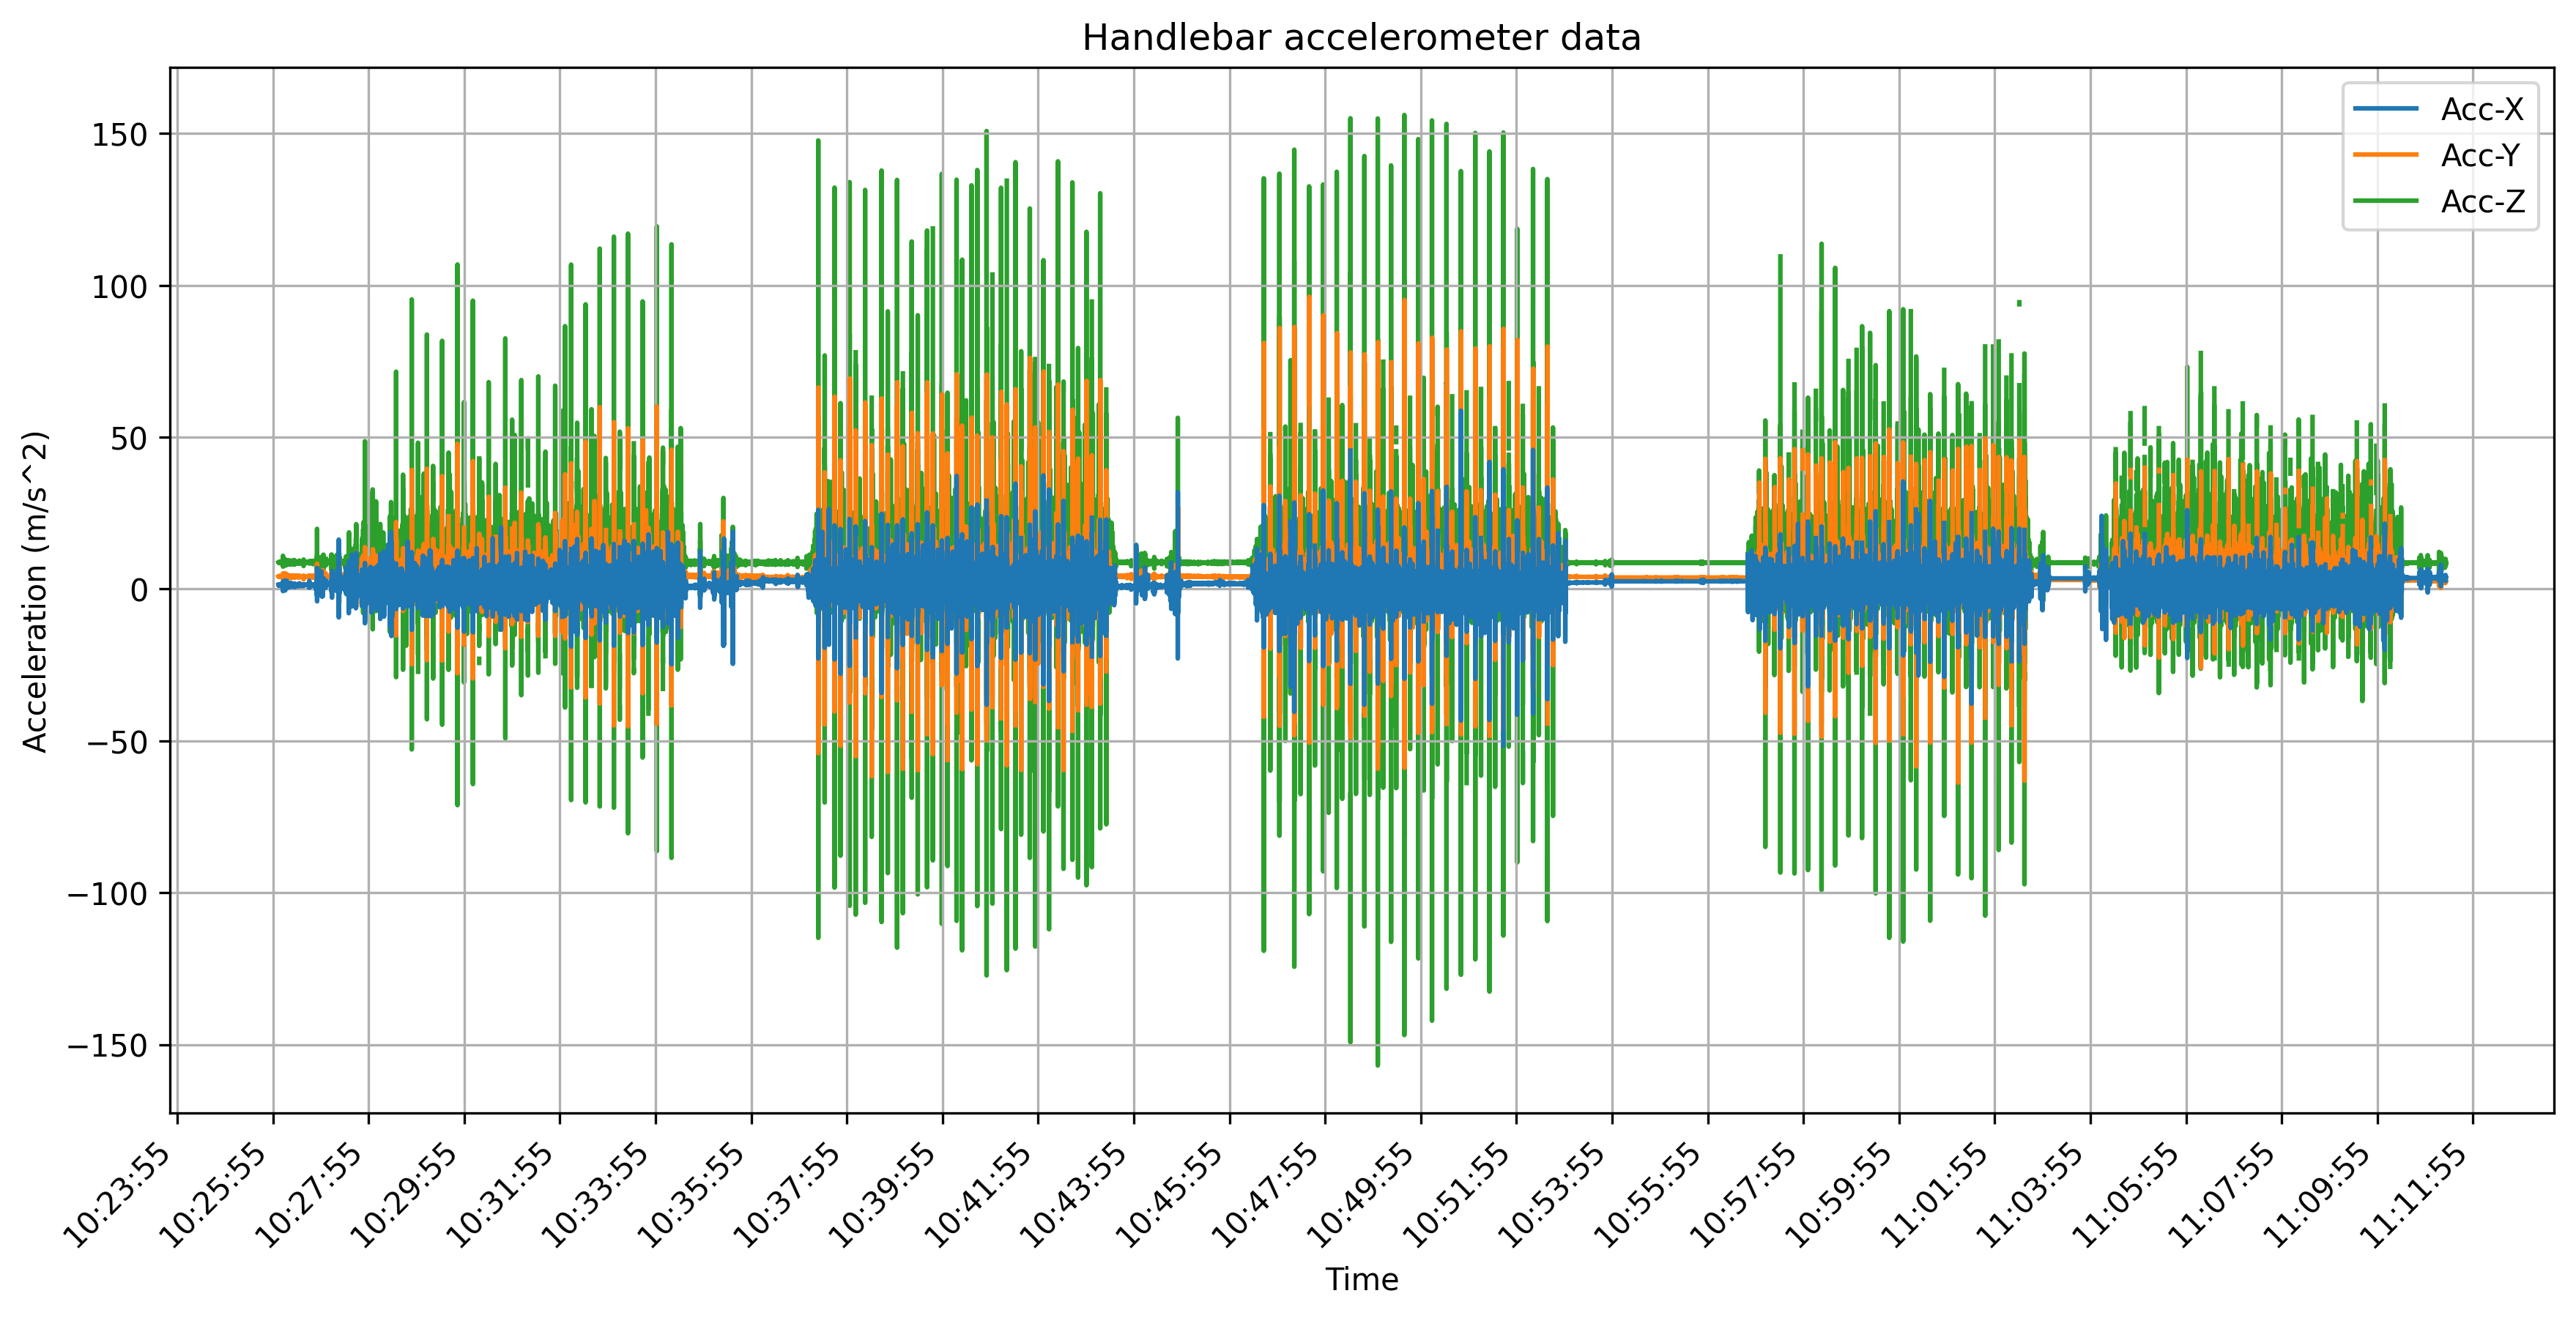

In [ ]:
#Show Acc-X,Y,Z if there is a value
plt.figure(figsize=(14, 7), dpi=300)
plt.title('Handlebar accelerometer data')
plt.plot(data_handlebar_acc.index, data_handlebar_acc['Acc-X'], label='Acc-X', zorder = 3)
plt.plot(data_handlebar_acc.index, data_handlebar_acc['Acc-Y'], label='Acc-Y', zorder = 2)
plt.plot(data_handlebar_acc.index, data_handlebar_acc['Acc-Z'], label='Acc-Z', zorder = 1)
plt.legend()
plt.grid()
plt.gcf().autofmt_xdate()
plt.xticks(rotation=45)
# Get the current axes
ax = plt.gca()
#set major ticks every 120 seconds for improved x-axis readability
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=120))
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.show()

In [ ]:
data_handlebar_acc[['Acc-X', 'Acc-Y', 'Acc-Z']].describe()
# std: standard deviation.
# 25% (1st quartile): 25% of the data have values below this number. 
# 50% (median): Half the values are below this number. 
# 75% (3rd quartile): 75% of the data are below this number. 

,Acc-X,Acc-Y,Acc-Z
count,547215.000000,547215.000000,547215.000000
mean,1.190114,3.757573,8.931617
std,2.122396,2.979504,5.708834
min,-51.446610,-63.748016,-156.896820
25%,0.057465,2.743759,7.398086
50%,1.369476,3.811569,8.652649
75%,2.528275,4.582504,10.668564
max,58.729767,96.275650,156.116330
